In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

In [18]:
# Class colors dictionary (202 changed to light brown #A0522D)
class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),  # Light grey
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),  # Dark green
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),  # Green
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),  # Olive
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),  # Brown
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),  # Purple
    202: ('#A0522D', 'Upland Grass Moor', 'D202', 'Band 07'),  # Light brown
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),  # Yellow
    204: ('#FFD700', 'Mosaic', 'D204', 'Band 09'),  # Gold
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),  # Red
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),  # Light green
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),  # Lime green
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),  # Blue
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),  # Cyan
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),  # Light blue
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),  # Grey
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),  # Grey (same as Suburban)
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),  # Light green (same as Improved Grassland)
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),  # Black
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),  # Black
    409: ('#000000', 'Road', 'OS409', 'Band 23'),  # Black
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),  # Grey (same as Suburban)
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),  # Black
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),  # Magenta
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'), # Deep pink
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')            # Hot pink
}

# Function to create colormap
def create_colormap(class_colors):
    values = sorted(class_colors.keys())
    colors = [class_colors[v][0] for v in values]
    return ListedColormap(colors), values

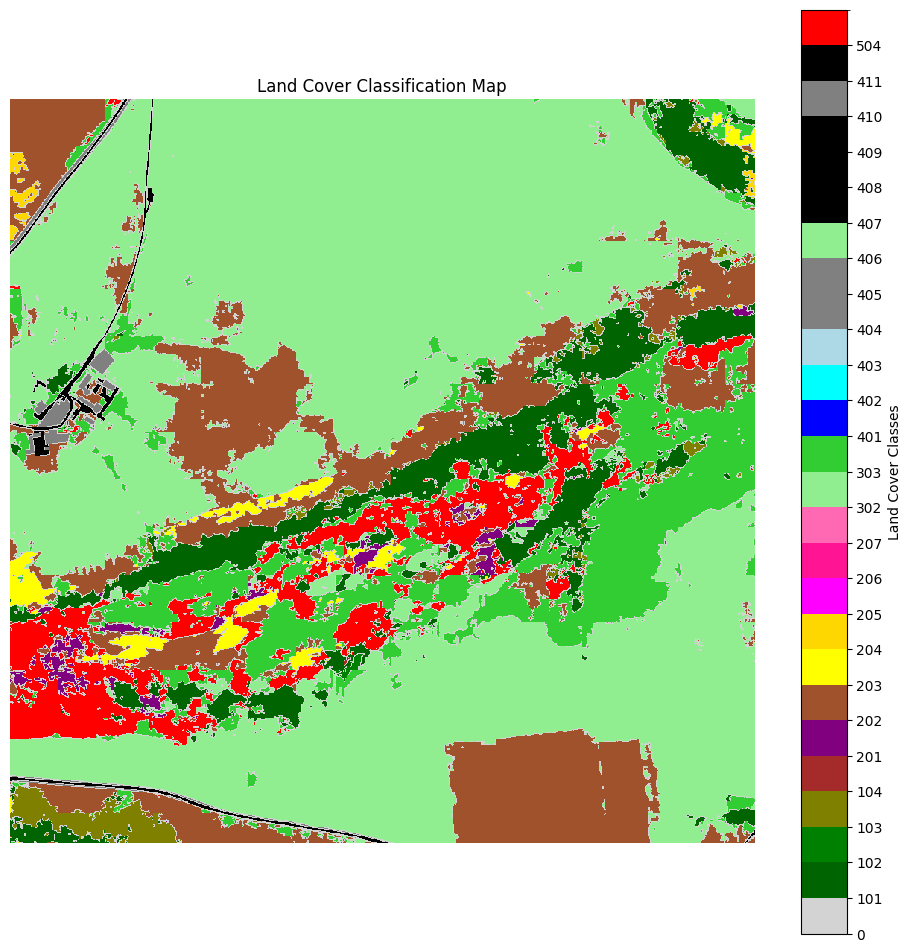

In [19]:
# Raster path
combined_raster_path = "../output_model/nlees_lcm_12pt5_rgb_reduce_1x1/SK1978_combined.tif"

# Load the raster
with rasterio.open(combined_raster_path) as src:
    raster_data = src.read()  # Read all bands
    meta = src.meta          # Metadata

# Use uint16 for composite raster to handle large values
composite_raster = np.zeros_like(raster_data[0], dtype=np.uint16)

# Map raster bands to classes in the dictionary
for i in range(raster_data.shape[0]):
    band_number = i + 1
    for code, (color, name, label, band) in class_colors_combined.items():
        if f"Band {band_number:02}" == band:
            composite_raster[raster_data[i] == 64] = code

# Generate colormap and normalization values
cmap, norm_values = create_colormap(class_colors_combined)

# Normalize for large class values
norm = BoundaryNorm(norm_values + [max(norm_values) + 1], cmap.N)

# Plot the raster with "nearest" interpolation to avoid artifacts
plt.figure(figsize=(12, 12))
plt.imshow(composite_raster, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(
    ticks=norm_values,
    label="Land Cover Classes",
    orientation="vertical"
)
plt.title("Land Cover Classification Map")
plt.axis('off')
plt.show()

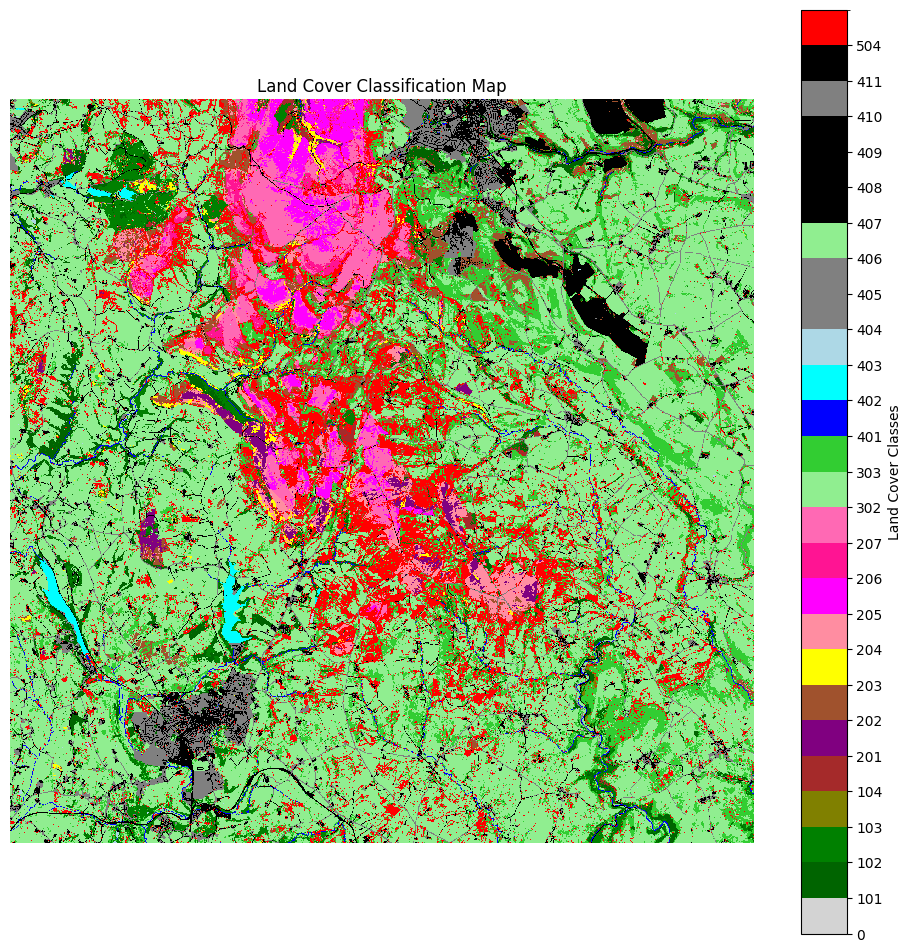

In [32]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

class_colors_combined = {
    0: ('#D3D3D3', 'No Class', '(nan)', 'Band 01'),  # Light grey
    101: ('#006400', 'Broadleaved Woodland', 'C101', 'Band 02'),  # Dark green
    102: ('#008000', 'Coniferous Woodland', 'C102', 'Band 03'),  # Green
    103: ('#808000', 'Scrub', 'C103', 'Band 04'),  # Olive
    104: ('#A52A2A', 'Felled/Young Trees', 'C104', 'Band 05'),  # Brown
    201: ('#800080', 'Heather Moorland', 'D201', 'Band 06'),  # Purple
    202: ('#A0522D', 'Upland Grass Moor', 'D202', 'Band 07'),  # Light brown
    203: ('#FFFF00', 'Bracken', 'D203', 'Band 08'),  # Yellow
    204: ('#FF8DA1', 'Mosaic', 'D204', 'Band 09'),  # Pink
    504: ('#FF0000', 'Rush Pasture', 'E504', 'Band 26'),  # Red
    302: ('#90EE90', 'Improved Grassland', 'E302', 'Band 13'),  # Light green
    303: ('#32CD32', 'Rough Grassland', 'E303', 'Band 14'),  # Lime green
    401: ('#0000FF', 'River', 'OS401', 'Band 15'),  # Blue
    402: ('#00FFFF', 'Lake', 'OS402', 'Band 16'),  # Cyan
    403: ('#ADD8E6', 'Pond', 'OS403', 'Band 17'),  # Light blue
    404: ('#808080', 'Suburban', 'OS404', 'Band 18'),  # Grey
    405: ('#808080', 'Cemeteries', 'OS405', 'Band 19'),  # Grey (same as Suburban)
    406: ('#90EE90', 'Playing Fields', 'OS406', 'Band 20'),  # Light green (same as Improved Grassland)
    407: ('#000000', 'Railway Verges', 'OS407', 'Band 21'),  # Black
    408: ('#000000', 'Railway', 'OS408', 'Band 22'),  # Black
    409: ('#000000', 'Road', 'OS409', 'Band 23'),  # Black
    410: ('#808080', 'Road Verges', 'OS410', 'Band 24'),  # Grey (same as Suburban)
    411: ('#000000', 'Dense Urban', 'OS411', 'Band 25'),  # Black
    205: ('#FF00FF', 'Heather Moorland on blanket bog/deep peat', 'D205', 'Band 10'),  # Magenta
    206: ('#FF1493', 'Upland Grass Moor on blanket bog/deep peat', 'D206', 'Band 11'), # Deep pink
    207: ('#FF69B4', 'Mosaic on blanket bog/deep peat', 'D207', 'Band 12')            # Hot pink
}

# Function to create colormap
def create_colormap(class_colors):
    values = sorted(class_colors.keys())
    colors = [class_colors[v][0] for v in values]
    return ListedColormap(colors), values

# Load the combined raster
combined_raster_path = "../output_model/mridge_lcm_10m/mridge_lcm_10m.tif"
with rasterio.open(combined_raster_path) as src:
    raster_data = src.read()  # Read all bands

# Use uint16 for composite raster to handle large values
composite_raster = np.zeros_like(raster_data[0], dtype=np.uint16)

# Map raster bands to classes in the dictionary
for i in range(raster_data.shape[0]):
    band_number = i + 1
    for code, (color, name, label, band) in class_colors_combined.items():
        if f"Band {band_number:02}" == band:
            composite_raster[raster_data[i] > 0] = code

# Generate colormap and normalization values
cmap, norm_values = create_colormap(class_colors_combined)

# Normalize for large class values
norm = BoundaryNorm(norm_values + [max(norm_values) + 1], cmap.N)

# Plot the raster with "nearest" interpolation to avoid artifacts
plt.figure(figsize=(12, 12))
plt.imshow(composite_raster, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(
    ticks=norm_values,
    label="Land Cover Classes",
    orientation="vertical"
)
plt.title("Land Cover Classification Map")
plt.axis('off')
plt.show()